Simple minded data anlysis of COVID19 data. Inspired by a Mathematica Notebook of Thomas Voigtmann

In [134]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn
from IPython.display import set_matplotlib_formats

seaborn.set()
set_matplotlib_formats("pdf", "png")

In [135]:
import datapackage
import pandas
import numpy

In [136]:
import urllib.request as request  # only needed explicitly for Cloudflare hack below

In [137]:
data = pandas.read_csv(
    "https://covid.ourworldindata.org/data/ecdc/new_cases.csv",
    index_col="date",
    parse_dates=True,
)
data.fillna("")

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,27,0,,0,,,,,,0,...,,,,,,0,,,,
2020-01-01,0,0,,0,,,,,,0,...,,,,,,0,,,,
2020-01-02,0,0,,0,,,,,,0,...,,,,,,0,,,,
2020-01-03,17,0,,0,,,,,,0,...,,,,,,0,,,,
2020-01-04,0,0,,0,,,,,,0,...,,,,,,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-09,90117,215,8,187,0,7,0,0,240,145,...,2,10,38,0,7,0,0,8,14,1
2020-05-10,87552,255,6,189,2,0,0,0,165,146,...,1,8,51,0,14,0,0,0,85,1
2020-05-11,79637,369,12,165,1,2,0,0,13,138,...,0,5,31,0,12,0,0,17,15,0


Raw data for a few European countries

Text(0, 0.5, 'daily new reports')

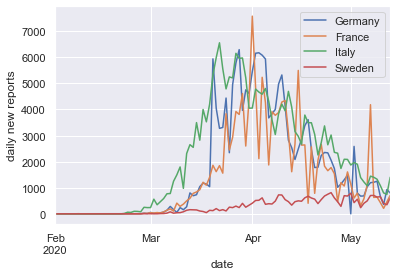

In [120]:
data[["Germany", "France", "Italy", "Sweden"]].plot(
    xlim=(pandas.to_datetime("1 Feb 2020"), data.index[-1])
).set_ylabel("daily new reports")

Apply a 7 day moving average to smooth the curves

Text(0, 0.5, 'daily new reports (7-day rolling mean)')

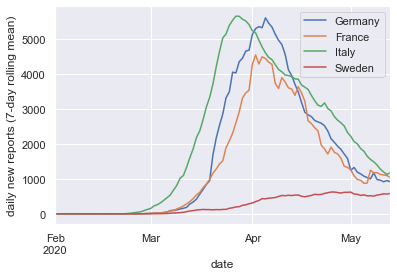

In [122]:
c = data.rolling(window=7).mean()
c[["Germany", "France", "Italy", "Sweden"]].plot(
    xlim=(pandas.to_datetime("1 Feb 2020"), data.index[-1])
).set_ylabel("daily new reports (7-day rolling mean)")

Population by country

In [51]:
package = datapackage.Package(
    "https://datahub.io/JohnSnowLabs/population-figures-by-country/datapackage.json"
)
# for i in range(len(package.resources)):
#   print(package.resource_names[i], package.resources[i].tabular)
# Spoof user agent to trick Cloudflare. Otherwise it blocks the download. Datahub should fix it
req = request.Request(
    package.resources[4].descriptor["path"],
    headers={
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36"
    },
)
population = pandas.read_csv(
    request.urlopen(req), index_col="Country"
)["Year_2016"]
# population = pandas.read_csv(package.resources[4].descriptor['path'])
population

Country
Aruba             104822.0
Afghanistan     34656032.0
Angola          28813463.0
Albania          2876101.0
Andorra            77281.0
                   ...    
Kosovo           1816200.0
Yemen, Rep.     27584213.0
South Africa    55908865.0
Zambia          16591390.0
Zimbabwe        16150362.0
Name: Year_2016, Length: 263, dtype: float64

Unfortunately, these have different names in the population data base

In [52]:
missing = set(data.columns.values) - set(population.index)
len(missing)

34

Fix the easy ones

In [53]:
mapping = dict()
for country in missing:
    res = population.index.str.contains(country)
    if res.any():
        mapping[population[res].index.values[0]] = country
population.rename(index=mapping, inplace=True)
len(set(data.columns.values) - set(population.index))

22

In [54]:
print(
    population.index.values[population.index.str.contains("Congo,")]
)
print(data.columns.values[data.columns.str.contains(" Congo")])
print(population.index.values[population.index.str.contains("Kyr")])
print(data.columns.values[data.columns.str.contains("Kyr")])
print(population.index.values[population.index.str.contains("Lao")])
print(data.columns.values[data.columns.str.contains("Lao")])
print(population.index.values[population.index.str.contains("Slova")])
print(data.columns.values[data.columns.str.contains("Slova")])
print(
    population.index.values[
        population.index.str.contains("Korea, Rep")
    ]
)
print(data.columns.values[data.columns.str.contains("Korea")])
mapping = {
    "Congo, Rep.": "Democratic Republic of Congo",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Laos",
    "Slovak Republic": "Slovakia",
    "Korea, Rep.": "South Korea",
}
population.rename(index=mapping, inplace=True)

['Congo, Rep.']
['Democratic Republic of Congo']
['Kyrgyz Republic']
['Kyrgyzstan']
['Lao PDR']
['Laos']
['Slovak Republic']
['Slovakia']
['Korea, Rep.']
['South Korea']


Confirmed cases per population

Text(0, 0.5, 'confirmed cases per population')

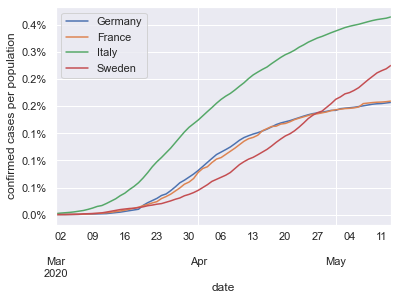

In [55]:
confirmed = data.cumsum()
ax = (confirmed / population)[
    ["Germany", "France", "Italy", "Sweden"]
].plot()
ax.yaxis.set_major_formatter(PercentFormatter(1.0, 1))
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])
ax.set_ylabel("confirmed cases per population")

Text(0, 0.5, 'confirmed cases per population')

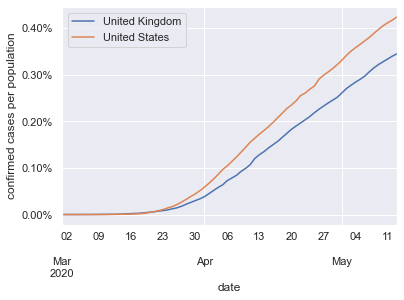

In [56]:
confirmed = data.cumsum()
ax = (confirmed / population)[
    ["United Kingdom", "United States"]
].plot()
ax.yaxis.set_major_formatter(PercentFormatter(1.0, 2))
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])
ax.set_ylabel("confirmed cases per population")

Naive estimate of active cases assuming everybody is sick for exactly 2 weeks

Text(0, 0.5, "'active' cases")

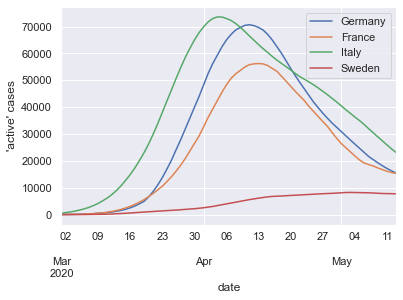

In [57]:
ax = (
    (confirmed - confirmed.shift(14))[
        ["Germany", "France", "Italy", "Sweden"]
    ]
    .rolling(window=7)
    .mean()
    .plot()
)
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])
ax.set_ylabel("'active' cases")

Text(0, 0.5, "'active' cases")

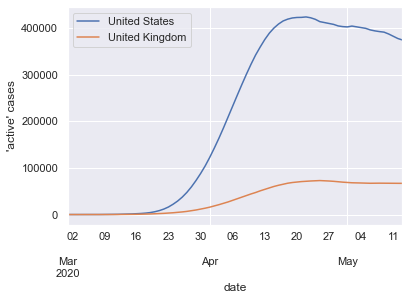

In [58]:
ax = (
    (confirmed - confirmed.shift(14))[
        ["United States", "United Kingdom"]
    ]
    .rolling(window=7)
    .mean()
    .plot()
)
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])
ax.set_ylabel("'active' cases")

Active cases per population

Text(0, 0.5, "'active' cases per population")

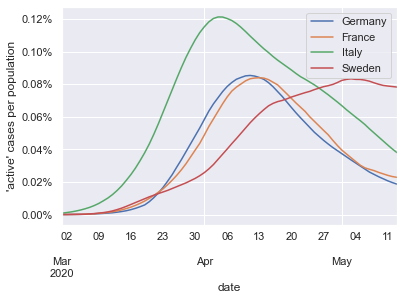

In [59]:
ax = (
    ((confirmed - confirmed.shift(14)) / population)[
        ["Germany", "France", "Italy", "Sweden"]
    ]
    .rolling(window=7)
    .mean()
    .plot()
)
ax.yaxis.set_major_formatter(PercentFormatter(1.0, 2))
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])
ax.set_ylabel("'active' cases per population")

Text(0, 0.5, "'active' cases per population")

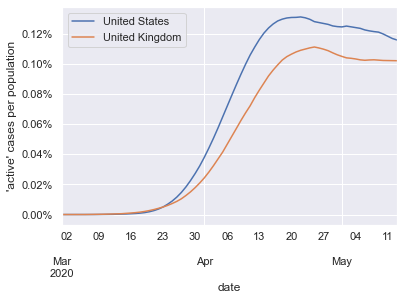

In [60]:
ax = (
    ((confirmed - confirmed.shift(14)) / population)[
        ["United States", "United Kingdom"]
    ]
    .rolling(window=7)
    .mean()
    .plot()
)
ax.yaxis.set_major_formatter(PercentFormatter(1.0, 2))
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])
ax.set_ylabel("'active' cases per population")

To estimate the reproduction rate, we use $R(t)\approx c(t)/c(t - 6)$. From https://www.medrxiv.org/content/10.1101/2020.04.22.20076430v1.full.pdf

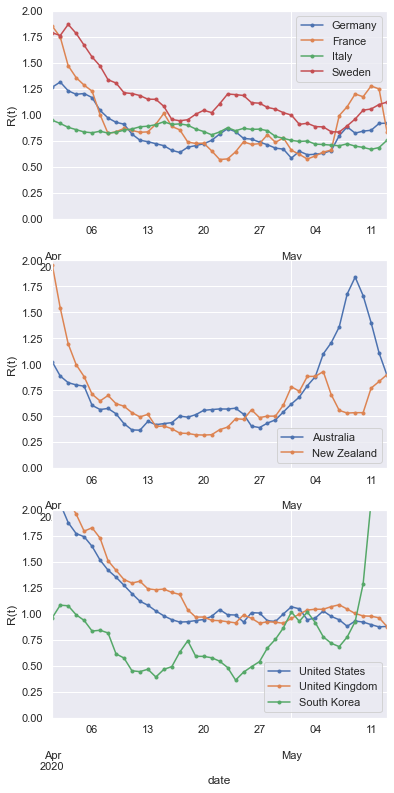

In [61]:
fig, axs = plt.subplots(3, 1, figsize=(6, 13))
R = c / c.shift(6)
R[["Germany", "France", "Italy", "Sweden"]].plot(
    ax=axs[0], style=".-"
)
R[["Australia", "New Zealand"]].plot(ax=axs[1], style=".-")
R[["United States", "United Kingdom", "South Korea"]].plot(
    ax=axs[2], style=".-"
)
for ax in axs:
    ax.set_xlim(pandas.to_datetime(("1 April 2020", "today")))
    ax.set_ylim(0, 2)
    ax.set_ylabel("R(t)")

In [62]:
newdeaths = pandas.read_csv(
    "https://covid.ourworldindata.org/data/ecdc/new_deaths.csv",
    index_col="date",
    parse_dates=True,
)
newdeaths.fillna("")

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0,0,,0,,,,,,0,...,,,,,,0,,,,
2020-01-01,0,0,,0,,,,,,0,...,,,,,,0,,,,
2020-01-02,0,0,,0,,,,,,0,...,,,,,,0,,,,
2020-01-03,0,0,,0,,,,,,0,...,,,,,,0,,,,
2020-01-04,0,0,,0,,,,,,0,...,,,,,,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-09,5268,3,0,5,0,0,0,0,11,1,...,0,1,0,0,0,0,0,1,0,0
2020-05-10,4440,6,0,6,1,0,0,0,7,1,...,0,0,0,0,0,0,0,0,3,0
2020-05-11,3410,5,0,8,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


Daily new deaths for a number of countries

Text(0, 0.5, 'daily new deaths')

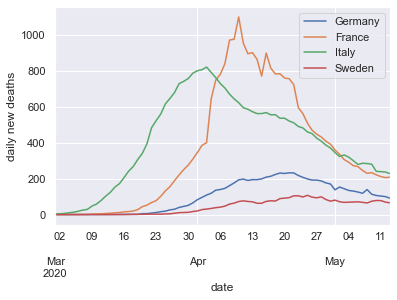

In [125]:
newdeaths[["Germany", "France", "Italy", "Sweden"]].rolling(
    window=7
).mean().plot(
    xlim=(pandas.to_datetime("1 Mar 2020"), data.index[-1])
).set_ylabel(
    "daily new deaths"
)

Text(0, 0.5, 'daily new deaths')

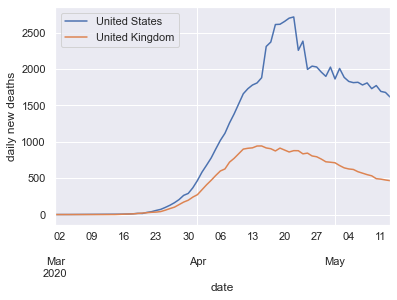

In [127]:
newdeaths[["United States", "United Kingdom"]].rolling(
    window=7
).mean().plot(
    xlim=(pandas.to_datetime("1 Mar 2020"), data.index[-1])
).set_ylabel(
    "daily new deaths"
)

Daily new deaths per population

Text(0, 0.5, 'daily new deaths')

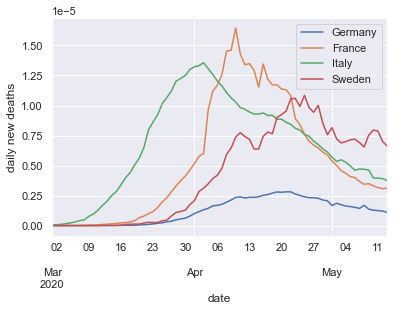

In [130]:
(newdeaths / population)[
    ["Germany", "France", "Italy", "Sweden"]
].rolling(window=7).mean().plot(
    xlim=(pandas.to_datetime("1 Mar 2020"), data.index[-1])
).set_ylabel(
    "daily new deaths"
)

Text(0, 0.5, 'daily new deaths')

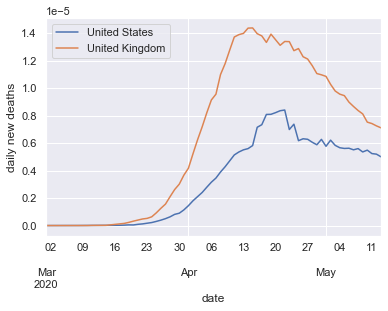

In [132]:
(newdeaths / population)[["United States", "United Kingdom"]].rolling(
    window=7
).mean().plot(
    xlim=(pandas.to_datetime("1 Mar 2020"), data.index[-1])
).set_ylabel(
    "daily new deaths"
)

Total deaths per population up to now

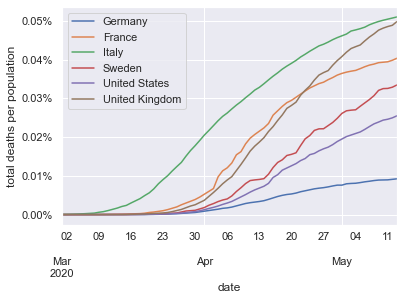

In [133]:
ax = (newdeaths.cumsum() / population)[
    [
        "Germany",
        "France",
        "Italy",
        "Sweden",
        "United States",
        "United Kingdom",
    ]
].plot(xlim=(pandas.to_datetime("1 Mar 2020"), data.index[-1]))
ax.set_ylabel("total deaths per population")
ax.yaxis.set_major_formatter(PercentFormatter(1, 2))

To calculate the case fatality rate (CFR) one would need the typical delay between confirmation and death which is not easily available. Here I consider that in the last few weeks, there is no good reason for the CFR to vary much and I adjust the delay to this effect. 

There seems to be a huge variation in the delay and in the CFR between countries. Part of it can definitely attributed to different counting and reporting strategies but some things are still puzzling. The new cases and the reaction to measures are almost identical between France and Germany. This would indicate very similar reporting practices. Yet France has four times the CFR of Germany. On the other hand Belgium and the UK seem to handle the crisis very differently, yet have exactly the same CFR.

Also the extremely low CFR of Iceland is probably due to the almost completey screening. However, I doubt Germany has seven times as many cases as reported because the model at ?? seems to work pretty well with an underreporting factor of two. 

The US is actually not doing as badly as it may seem and the west has a hard time beating China's CFR.

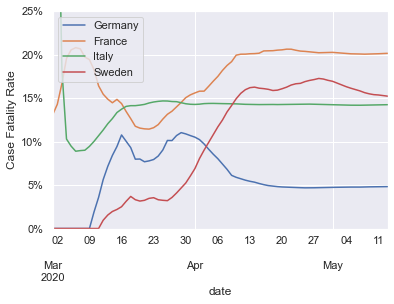

In [68]:
ax = (
    (newdeaths.cumsum() / data.shift(14).cumsum())[["Germany"]]
    .rolling(window=7)
    .mean()
    .plot()
)
(newdeaths.cumsum() / data.shift(7).cumsum())[["France"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / data.shift(4).cumsum())[["Italy"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / data.shift(9).cumsum())[["Sweden"]].rolling(
    window=7
).mean().plot(ax=ax)
ax.set_xlim(pandas.to_datetime(("1 Mar 2020", "today")))
ax.set_ylim(0, 0.25)
ax.set_ylabel("Case Fatality Rate")
ax.yaxis.set_major_formatter(PercentFormatter(1, 0))

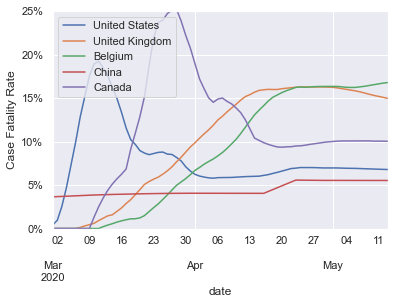

In [69]:
ax = (
    (newdeaths.cumsum() / data.shift(6).cumsum())[["United States"]]
    .rolling(window=7)
    .mean()
    .plot()
)
(newdeaths.cumsum() / data.shift(1).cumsum())[
    ["United Kingdom"]
].rolling(window=7).mean().plot(ax=ax)
(newdeaths.cumsum() / data.shift(3).cumsum())[["Belgium"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / data.shift(6).cumsum())[["China"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / data.shift(13).cumsum())[["Canada"]].rolling(
    window=7
).mean().plot(ax=ax)
ax.set_xlim(pandas.to_datetime(("1 March 2020", "today")))
ax.set_ylim(0, 0.25)
ax.set_ylabel("Case Fatality Rate")
ax.yaxis.set_major_formatter(PercentFormatter(1, 0))

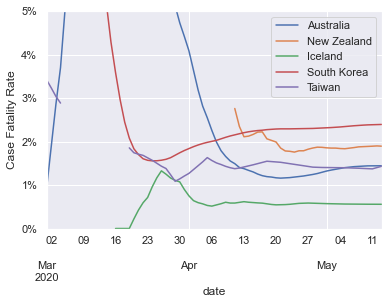

In [70]:
ax = (
    (newdeaths.cumsum() / data.shift(12).cumsum())[["Australia"]]
    .rolling(window=7)
    .mean()
    .plot()
)
(newdeaths.cumsum() / data.shift(18).cumsum())[
    ["New Zealand"]
].rolling(window=7).mean().plot(ax=ax)
(newdeaths.cumsum() / data.shift(10).cumsum())[["Iceland"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / data.shift(14).cumsum())[
    ["South Korea"]
].rolling(window=7).mean().plot(ax=ax)
(newdeaths.cumsum() / data.shift(2).cumsum())[["Taiwan"]].rolling(
    window=7
).mean().plot(ax=ax)
ax.set_xlim(pandas.to_datetime(("1 Mar 2020", "today")))
ax.set_ylim(0, 0.05)
ax.set_ylabel("Case Fatality Rate")
ax.yaxis.set_major_formatter(PercentFormatter(1, 0))

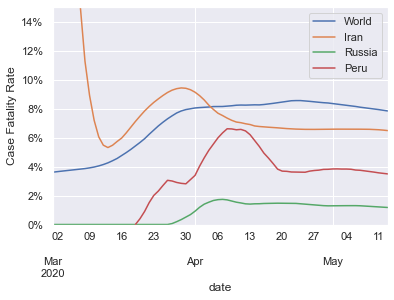

In [71]:
ax = (
    (newdeaths.cumsum() / data.shift(5).cumsum())[["World"]]
    .rolling(window=7)
    .mean()
    .plot()
)
(newdeaths.cumsum() / data.shift(3).cumsum())[["Iran"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / data.shift(4).cumsum())[["Russia"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / data.shift(4).cumsum())[["Peru"]].rolling(
    window=7
).mean().plot(ax=ax)
ax.set_xlim(pandas.to_datetime(("1 Mar 2020", "today")))
ax.set_ylim(0, 0.15)
ax.set_ylabel("Case Fatality Rate")
ax.yaxis.set_major_formatter(PercentFormatter(1, 0))

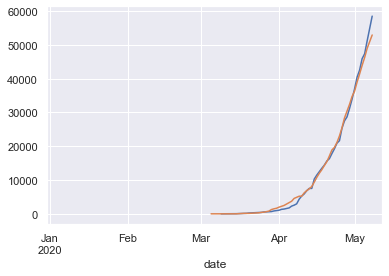

In [28]:
ax = data['Peru'][:-4].cumsum().plot()
(27*newdeaths['Peru'].shift(-4).cumsum()).plot(ax=ax)

German events and german events delayed by 12 days

In [29]:
events = {
    "Germany": ["2020 Mar 8", "2020 Mar 13", "2020 Mar 22"],
    "France": ["2020 Mar 13", "2020 Mar 16"],
    "Italy": ["2020 Feb 22", "2020 Mar 4", "2020 Mar 11"],
    "Spain": ["2020 Mar 14", "2020 Mar 29"],
}

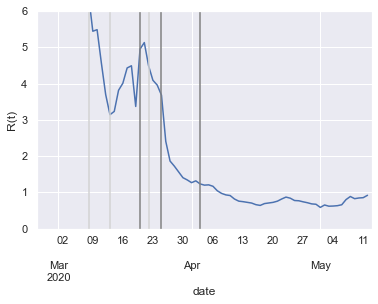

In [30]:
ax = R["Germany"].plot(
    xlim=pandas.to_datetime(("25 Feb 2020", "today")), ylim=(0, 6)
)
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events["Germany"]):
    ax.axvline(ev, c="lightgrey")
    ax.axvline(ev + pandas.Timedelta("12 days"), c="grey")

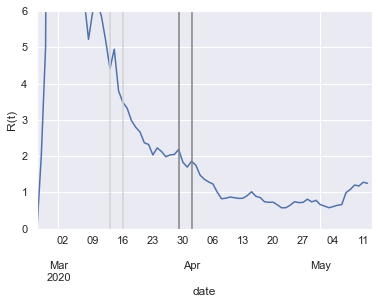

In [31]:
ax = R["France"].plot(
    xlim=pandas.to_datetime(("25 Feb 2020", "today")), ylim=(0, 6)
)
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events["France"]):
    ax.axvline(ev, c="lightgrey")
    ax.axvline(ev + pandas.Timedelta("16 days"), c="grey")

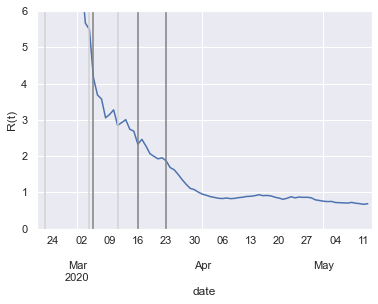

In [32]:
ax = R["Italy"].plot(
    xlim=pandas.to_datetime(("20 Feb 2020", "today")), ylim=(0, 6)
)
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events["Italy"]):
    ax.axvline(ev, c="lightgrey")
    ax.axvline(ev + pandas.Timedelta("12 days"), c="grey")

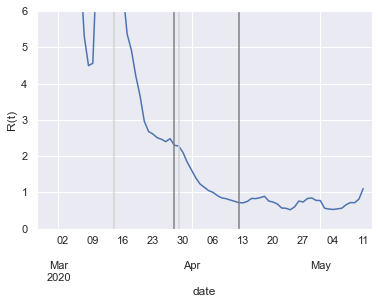

In [33]:
ax = R["Spain"].plot(
    xlim=pandas.to_datetime(("25 Feb 2020", "today")), ylim=(0, 6)
)
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events["Spain"]):
    ax.axvline(ev, c="lightgrey")
    ax.axvline(ev + pandas.Timedelta("14 days"), c="grey")

Countries with a mean R (averaged over the last 30 days) below 0.8. 

In [72]:
highlight = set(
    [
        "Germany",
        "France",
        "World",
        "Japan",
        "Spain",
        "Venezuela",
        "Sweden",
        "United States",
        "United Kingdom",
        "Turkey",
        "Russia",
        "China",
        "Taiwan",
    ]
)

[None, None, None]

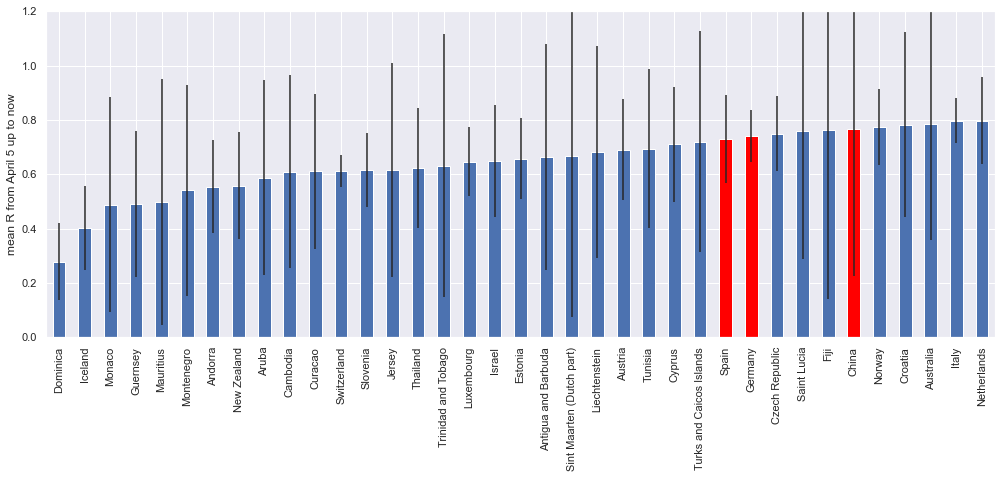

In [73]:
pandas.set_option("use_inf_as_na", True)
Rrecent = R[
    (pandas.to_datetime("today") - pandas.to_timedelta("30 days")) :
]
Rmean = Rrecent[Rrecent > 0.0].mean().dropna()
Rerr = Rrecent.std().dropna()

low = Rmean[(Rmean <= 0.8) & (Rerr < 0.9)].sort_values()
ax = low.plot.bar(yerr=Rerr, figsize=(17, 6), ylim=(0, 1.2))
ax.set_ylabel("mean R from April 5 up to now")
[
    ax.patches[low.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(low.index.values))
]

Countrys with a mean R around 1

[None, None, None, None, None, None, None]

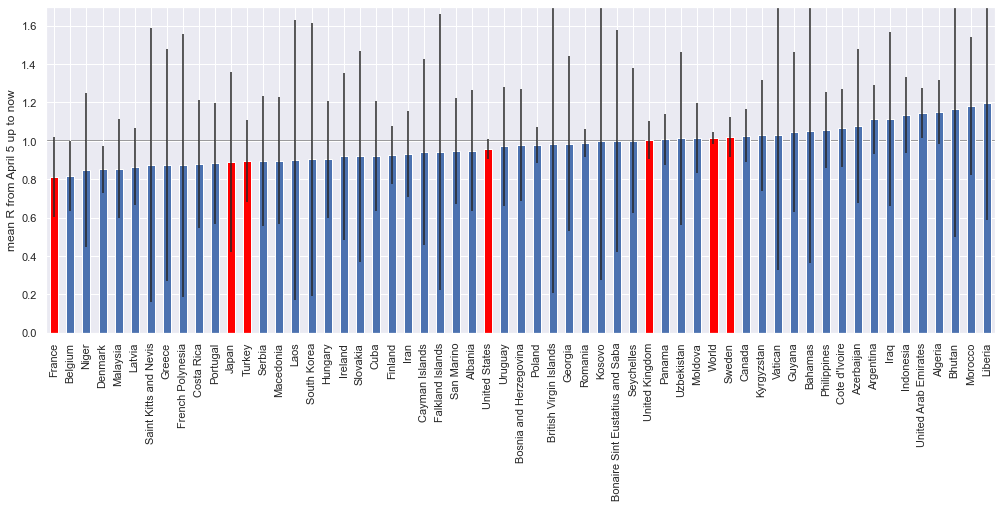

In [74]:
middle = Rmean[
    (Rmean > 0.8) & (Rmean <= 1.2) & (Rerr < 0.8)
].sort_values()
ax = middle.plot.bar(yerr=Rerr, figsize=(17, 6), ylim=(0, 1.7))
ax.set_ylabel("mean R from April 5 up to now")
ax.axhline(1, c="grey", zorder=0)
[
    ax.patches[middle.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(middle.index.values))
]

Countrys with a higher mean R but still below 2

[None, None]

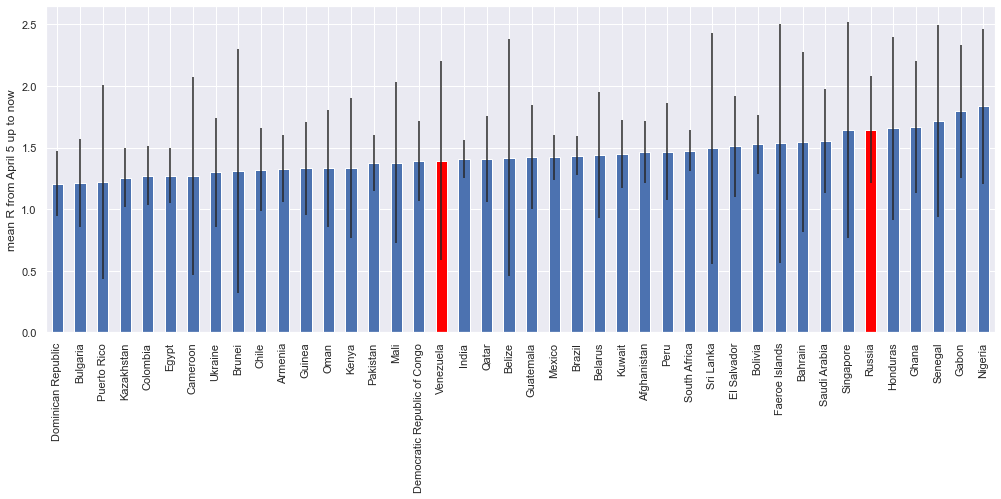

In [75]:
higher = Rmean[
    (Rmean > 1.2) & (Rmean <= 2) & (Rerr < 1)
].sort_values()
ax = higher.plot.bar(yerr=Rerr, figsize=(17, 6))
ax.set_ylabel("mean R from April 5 up to now")
[
    ax.patches[higher.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(higher.index.values))
]

Pretty miserable countries with a R above 2

[]

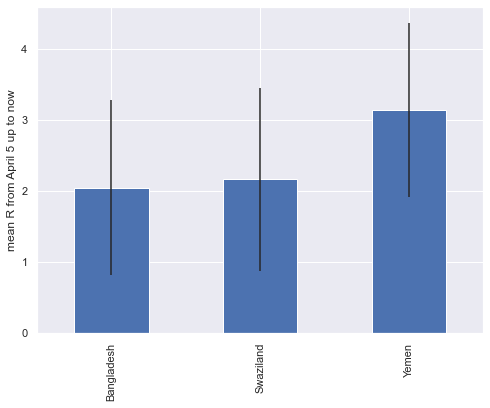

In [76]:
high = Rmean[(Rmean > 2) & (Rerr < 1.5)].sort_values()
ax = high.plot.bar(yerr=Rerr, figsize=(8, 6))
ax.set_ylabel("mean R from April 5 up to now")
[
    ax.patches[high.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(high.index.values))
]

Doubling time for countries with more than 200 cases. Start with the nice ones with 5 weeks or more

[None, None, None, None]

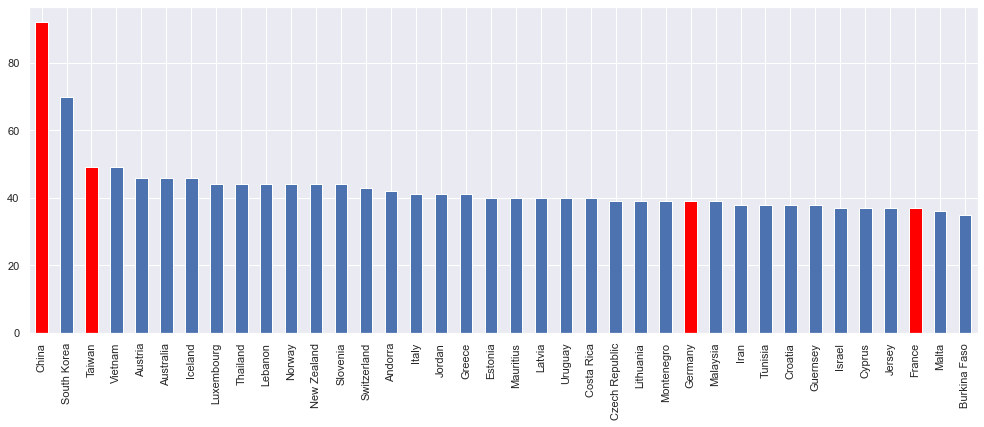

In [101]:
total = data.cumsum()
dbltime = (
    total.index[-1] - (total - total.iloc[-1] / 2).abs().idxmin()
).sort_values(ascending=False)
tslice = dbltime[(dbltime >= pandas.Timedelta("35 days")) & (total.iloc[-1] > 200)].dt.days
ax = tslice.plot.bar(figsize=(17, 6))
[
    ax.patches[tslice.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(tslice.index.values))
]

[None, None, None, None, None, None, None]

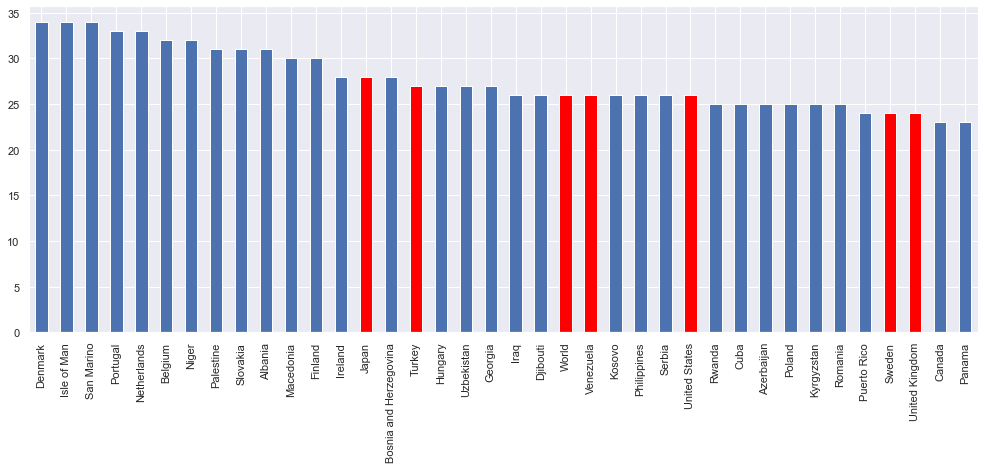

In [103]:
tslice = dbltime[
    (dbltime < pandas.Timedelta("35 days"))
    & (dbltime >= pandas.Timedelta("23 days"))
    & (total.iloc[-1] > 200)
].dt.days
ax = tslice.plot.bar(figsize=(17, 6))
[
    ax.patches[tslice.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(tslice.index.values))
]

[]

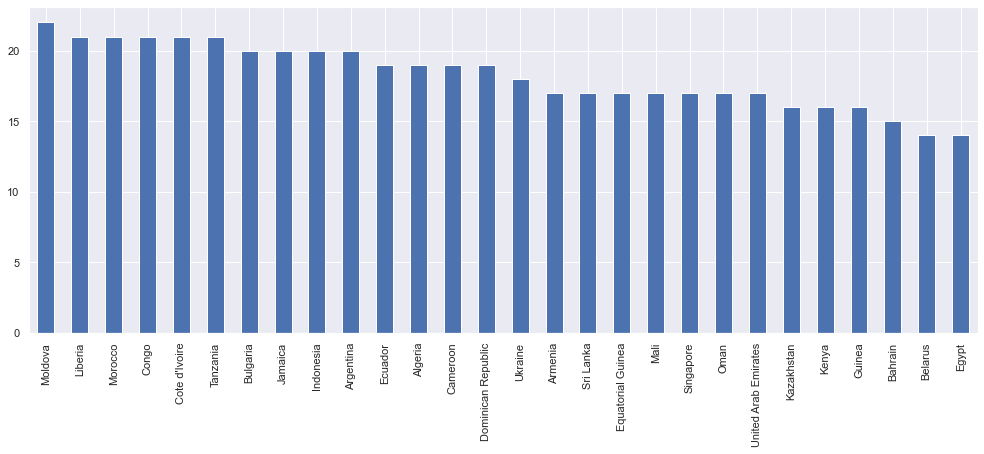

In [104]:
tslice = dbltime[(dbltime < pandas.Timedelta("23 days")) & (dbltime >= pandas.Timedelta("14 days")) & (total.iloc[-1] > 200)].dt.days
ax = tslice.plot.bar(figsize=(17,6))
[
    ax.patches[tslice.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(tslice.index.values))
]

[None]

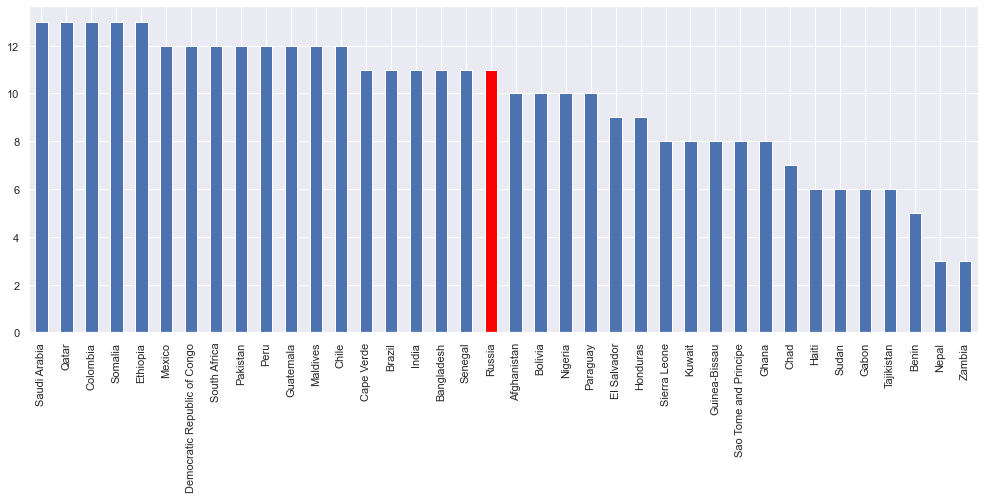

In [100]:
tslice = dbltime[(dbltime < pandas.Timedelta("14 days")) & (total.iloc[-1] > 200)].dt.days
ax = tslice.plot.bar(figsize=(17,6))
[
    ax.patches[tslice.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(tslice.index.values))
]

In [81]:
%load_ext blackcellmagic